# LFY032

## Föreläsning 1 - Arbeta med data, del 1

Fredrik Skärberg


In [1]:
#importera moduler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


### Information om dataset
* Data över valresultat från 1910 från statistiska centralbyrån SCB
* Innehåller data från alla val, Region, Landsting och Riksdag samt valdeltagande


In [2]:
#Läs in data
data = pd.read_csv('val.csv')


In [3]:
type(data)


pandas.core.frame.DataFrame

In [7]:
#Visa de första raderna
data.head()


,År,,Typ,valdeltagande,M,C,L,M+C+FP,C+FP,KD,MP,NYD,S,V,SD,övr)
0,1910,NaN,L,50.8,40.1,NaN,42.5,NaN,NaN,NaN,NaN,NaN,16.8,NaN,NaN,0.6
1,1911,NaN,R,57.0,31.2,NaN,40.2,NaN,NaN,NaN,NaN,NaN,28.5,NaN,NaN,0.1
2,1912,NaN,L3),46.9,42.4,NaN,35.7,NaN,NaN,NaN,NaN,NaN,21.8,NaN,NaN,0.1
3,1914,NaN,L3),63.8,39.8,NaN,33.7,NaN,NaN,NaN,NaN,NaN,26.4,NaN,NaN,0.1
4,1914,vår,R,69.9,37.7,NaN,32.2,NaN,NaN,NaN,NaN,NaN,30.1,NaN,NaN,0.0


In [8]:
#Visa de sista raderna
data.tail(5)

,År,,Typ,valdeltagande,M,C,L,M+C+FP,C+FP,KD,MP,NYD,S,V,SD,övr)
73,2014,NaN,L,82.4,21.5,6.3,6.3,NaN,NaN,5.2,7.2,NaN,32.9,7.1,9.1,4.4
74,2014,NaN,K,82.8,21.6,7.9,6.6,NaN,NaN,4.0,7.8,NaN,31.2,6.4,9.3,5.3
75,2018,NaN,R,87.2,19.8,8.6,5.5,NaN,NaN,6.3,4.4,NaN,28.3,8.0,17.5,1.5
76,2018,NaN,L,83.7,19.3,8.4,6.3,NaN,NaN,7.1,4.1,NaN,28.7,8.6,12.9,4.6
77,2018,NaN,K,84.1,20.0,9.7,6.8,NaN,NaN,5.2,4.6,NaN,27.6,7.7,12.7,5.6


In [9]:
#data_np = data.to_numpy()
#data_dict = data.to_dict()
#data_np

#Vi kan acessa Riksdagsvalet genom nyckeln
data["Typ"] == "R"


0     False
1      True
2     False
3     False
4      True
      ...  
73    False
74    False
75     True
76    False
77    False
Name: Typ, Length: 78, dtype: bool

In [14]:
#Filtrera ut riksdagsvalet
riksdag = data[data["Typ"] == "R"]
riksdag[:5]



,År,,Typ,valdeltagande,M,C,L,M+C+FP,C+FP,KD,MP,NYD,S,V,SD,övr)
1,1911,NaN,R,57.0,31.2,NaN,40.2,NaN,NaN,NaN,NaN,NaN,28.5,NaN,NaN,0.1
4,1914,vår,R,69.9,37.7,NaN,32.2,NaN,NaN,NaN,NaN,NaN,30.1,NaN,NaN,0.0
5,1914,höst,R,66.2,36.5,0.2,26.9,NaN,NaN,NaN,NaN,NaN,36.4,NaN,NaN,0.0
7,1917,NaN,R,65.8,24.7,8.5,27.6,NaN,NaN,NaN,NaN,NaN,31.1,NaN,NaN,8.1
10,1920,NaN,R,55.3,27.9,14.2,21.8,NaN,NaN,NaN,NaN,NaN,29.6,NaN,NaN,6.4


### Låt oss göra en figur över valdeltagandet.

<AxesSubplot:xlabel='År', ylabel='Valdeltagande (%)'>

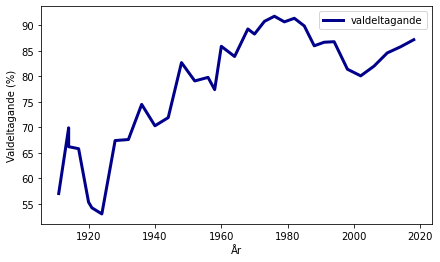

In [16]:
#Graf över valdeltagandet från start till slut
riksdag.plot(
    x="År", 
    y="valdeltagande",
    figsize=(7, 4),
    ylabel='Valdeltagande (%)',
    xlabel='År',
    color='darkblue',
    lw=3
    )


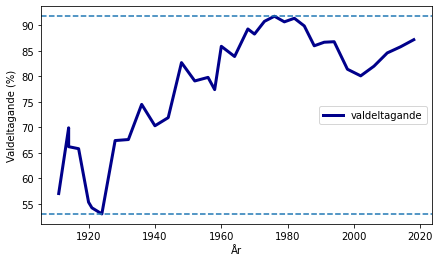

In [25]:
#Gör en horisontell linje för det minsta och högsta valdeltagandet.
riksdag.plot(
    x="År", 
    y="valdeltagande",
    figsize=(7, 4),
    ylabel='Valdeltagande (%)',
    xlabel='År',
    color='darkblue',
    lw=3
    )
plt.axhline(min(riksdag['valdeltagande']), ls='--')
plt.axhline(max(riksdag['valdeltagande']), ls='--')


### Vilket år var det minst vs. högst valdeltagande?

In [19]:
# Hitta året med lägst valdeltagande
min_valdeltagande = riksdag.loc[riksdag['valdeltagande'].idxmin()]

# Hitta året med högst valdeltagande
max_valdeltagande = riksdag.loc[riksdag['valdeltagande'].idxmax()]

In [24]:
max_valdeltagande['År'] #min_valdeltagande['År']

1976

### Låt oss jämföra Socialdemokraterna och Moderaterna

In [27]:
partier = [
    ("S", "red"),
    ("M", "blue"),
]

<AxesSubplot:title={'center':'S vs. M'}, xlabel='År', ylabel='Valdeltagande (%)'>

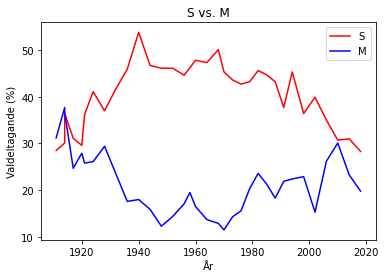

In [29]:
#Socialdemokraterna vs. Moderaterna
riksdag.plot(
    x="År", 
    y=[parti for parti, _ in partier], 
    color=[color for _, color in partier], 
    title='S vs. M',
    ylabel='Valdeltagande (%)',
    xlabel='År',
    )


<AxesSubplot:title={'center':'S, M, C och L'}, xlabel='År'>

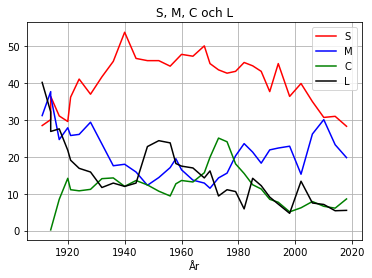

In [31]:
partier = [
    ("S", "red"),
    ("M", "blue"),
    ("C", "green"),
    ("L", "black")
]

riksdag.plot(
    x="År", 
    y=[parti for parti, _ in partier], 
    color=[color for _, color in partier], 
    title='S, M, C och L',
    grid=True
    )


In [33]:
#riksdag.keys()
allapartier = list(riksdag.keys()[4:])
allapartier

['M', 'C', 'L', 'M+C+FP', 'C+FP', 'KD', 'MP', 'NYD', 'S', 'V', 'SD', 'övr)']

In [34]:
#Ta bort 'M+C+FP', 'C+FP' och 'KD+FP' från alla partier
allapartier.remove('M+C+FP')
allapartier.remove('C+FP')

<AxesSubplot:xlabel='År', ylabel='Valresultat (%)'>

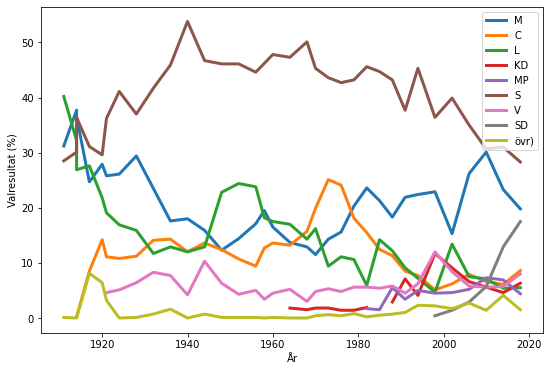

In [36]:
#Graf över allapartier
riksdag.plot(
    "År", 
    allapartier,
    #color = ["red", "blue", "green", "black"],
    figsize=(9,6),
    ylabel='Valresultat (%)',
    xlabel='År',
    lw=3
    )

### Vi kan visualisera valresultatet för ett år med ett cirkel- eller stapeldiagram.

In [46]:
#Gör en barplot över valresultatet för 2018
riksdag2018 = riksdag[riksdag['År']==2010]
riksdag2018


,År,,Typ,valdeltagande,M,C,L,M+C+FP,C+FP,KD,MP,NYD,S,V,SD,övr)
69,2010,NaN,R,84.6,30.1,6.6,7.1,NaN,NaN,5.6,7.3,NaN,30.7,5.6,5.7,1.4


In [47]:
#Gör om riksdata2018 till en serie
riksdag2018 = riksdag2018.squeeze()
riksdag2018 = riksdag2018.drop(['Typ', 'År', 'valdeltagande','M+C+FP', 'C+FP'])
riksdag2018

         NaN
M       30.1
C        6.6
L        7.1
KD       5.6
MP       7.3
NYD      NaN
S       30.7
V        5.6
SD       5.7
övr)     1.4
Name: 69, dtype: object

<AxesSubplot:title={'center':'Valresultat 2018'}, xlabel='Parti', ylabel='Valresultat (%)'>

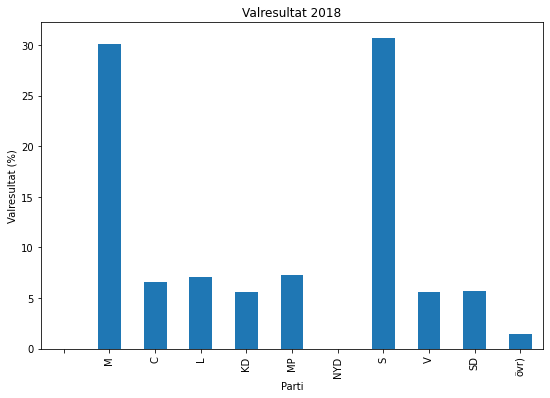

In [48]:
#kind='bar' ger en stapeldiagram
riksdag2018.plot(
    kind='bar',figsize=(9,6), ylabel='Valresultat (%)', xlabel='Parti', title='Valresultat 2018',
    )


<AxesSubplot:title={'center':'Valresultat 2018'}, ylabel='Valresultat (%)'>

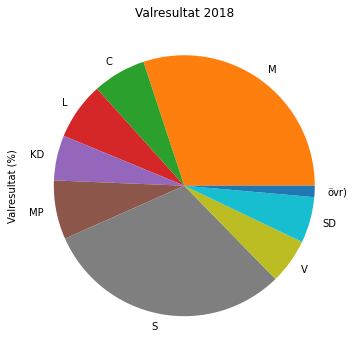

In [49]:
# kind='pie' ger en cirkeldiagram
riksdag2018.plot(
    kind='pie',figsize=(9,6), ylabel='Valresultat (%)', xlabel='Parti', title='Valresultat 2018',
    )